In [8]:
%pylab inline --no-import-all
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve,root
import ad
import ad.admath

Populating the interactive namespace from numpy and matplotlib


# Kronig–Penney model

The dispersion relation for the Kronig-Penney Model(see https://en.wikipedia.org/wiki/Particle_in_a_one-dimensional_lattice) can be determined from the equations(for very narrow situation, ie: $b<<a$):
$$
cos(ka)=cos(\alpha a) + P\frac{sin(\alpha a)}{\alpha a}\\
P=\frac{mV_0ba}{\hbar^2}\\
\alpha^2 = \frac{2m |E|}{\hbar^2}\\
V_0 * b = const
$$

$$
  E = E_0 + 2t(1-\cos ka) + \cdots
$$

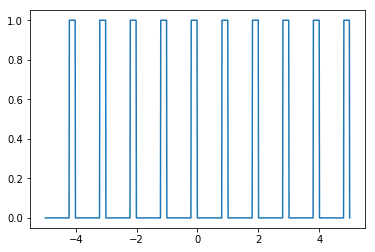

In [4]:
from scipy.optimize import brentq
a = 1.0
b = 0.2
m = 0.5
hbar = 1.0
V0 = 1.0
P = m * V0 * b * a / hbar**2
P = 1.5
xs= np.linspace(-5,5,1000)
def PlotPotential(xs,v0, a, b):
    ys = [0.0 if ((int(x * 100.0 / a) % 100 + 100) % 100) / 100.0 < 1.0 - b else v0 for x in xs ]
    plt.plot(xs,ys)
PlotPotential(xs,V0,a,b)

if $2mtd^2=0.16$, then we have:
$$
t = \frac{0.16}{2md^2}=0.16
$$

In [380]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
class KronigPenney(object):
    def __init__(self,P=1.5,b=0.1):
        self.b = b
        self.P = P # I pick the P fixed to 1.5, not sure if this was OK
        self.V0 = P * hbar**2 / m / a/ b
        
    def DispersionRHS(self,E_,d=0):
        E = self.V0 * E_
        np_ = np
        if d==1:
            E = ad.adfloat(E)
            np_ = ad.admath

        alpha_a = a * np_.sqrt(2* m * E) / hbar
        res = np_.cos(alpha_a) + self.P * np_.sin(alpha_a) / alpha_a
        if d == 1:
            return res.d(E)
        return  res
    def GetGroundEnergy(self): # this is actually the E0, or the ground energy
        def _lam(E):
            return 1.0 - self.DispersionRHS(E)
        return brentq(_lam, 1e-12,0.5-1e-12)
    
    def GetTunnelingAmplitude(self):
        E0 = self.GetGroundEnergy()
        dE = self.DispersionRHS(E0,d=1)
        return -.5 / dE
   


0.07933271051024161
1.0000000000004767
0.9628043691750666


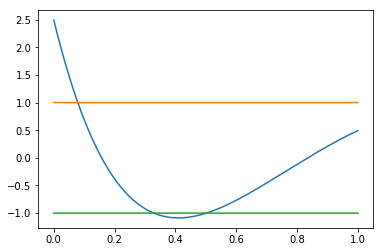

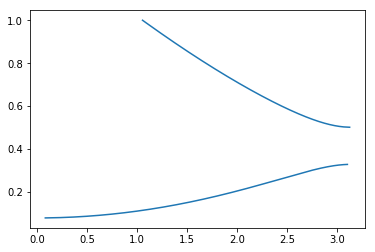

In [390]:
KP = KronigPenney(b=0.1)
E0=KP.GetGroundEnergy()
print(E0)
print((KP.DispersionRHS(E_max)))
print(KP.GetTunnelingAmplitude())

Es = np.linspace(0,1,2000)
rhs = KP.DispersionRHS(Es)
ka = np.arccos(rhs)
#plt.plot(Es, rhs)
plt.plot(Es, rhs)
plt.plot(Es, [1 for _ in rhs])
plt.plot(Es, [-1 for _ in rhs])
plt.show()

plt.plot(ka, Es)

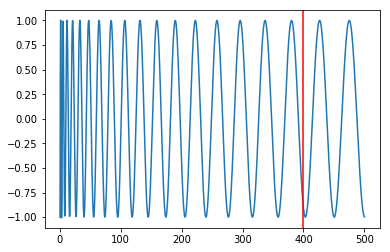

In [385]:
es = np.linspace(0,500,1000)
KP = KronigPenney(P=1.5,b=0.1)
RHS = KP.DispersionRHS(es)
plt.plot(es,RHS)
K_f=20
plt.axvline(K_f**2/2/m, c='r')

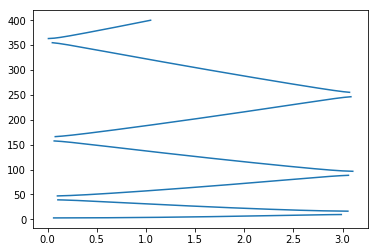

In [12]:
alpha_as = np.linspace(0,20, 1000)
P = 2
def DispersionRHS(alpha_a):
    return  np.cos(alpha_a) + P * np.sin(alpha_a) / alpha_a
KP = KronigPenney(.5143)

#plt.plot(alpha_as, DispersionRHS(alpha_as))
rhs = DispersionRHS(alpha_as)
Es = alpha_as**2 * hbar**2 / 2.0/m
ka = np.arccos(rhs)
plt.plot(ka, Es)